<a href="https://colab.research.google.com/github/Hrishik31/Wine_Prediction_Model_ML/blob/main/Wine_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINE CLASSIFICATION ANALYSIS
Loading Wine dataset...
Dataset shape: (178, 13)
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']... (showing first 5)
--------------------------------------------------
Adding noise with factor: 0.3
Splitting data (80% train, 20% test)...
Training set size: 142
Test set size: 36
--------------------------------------------------
Standardizing features...
Initializing models...
MODEL TRAINING AND EVALUATION
Training Random Forest...
Random Forest Training completed. Accuracy: 1.000
Creating confusion matrix for Random Forest...


<Figure size 800x600 with 0 Axes>

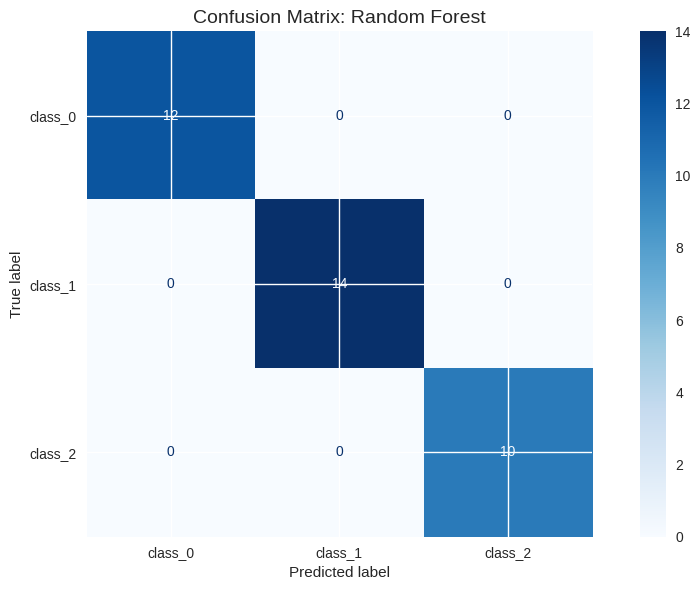


Classification Report for Random Forest:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

--------------------------------------------------
Training SVM...
SVM Training completed. Accuracy: 0.972
Creating confusion matrix for SVM...


<Figure size 800x600 with 0 Axes>

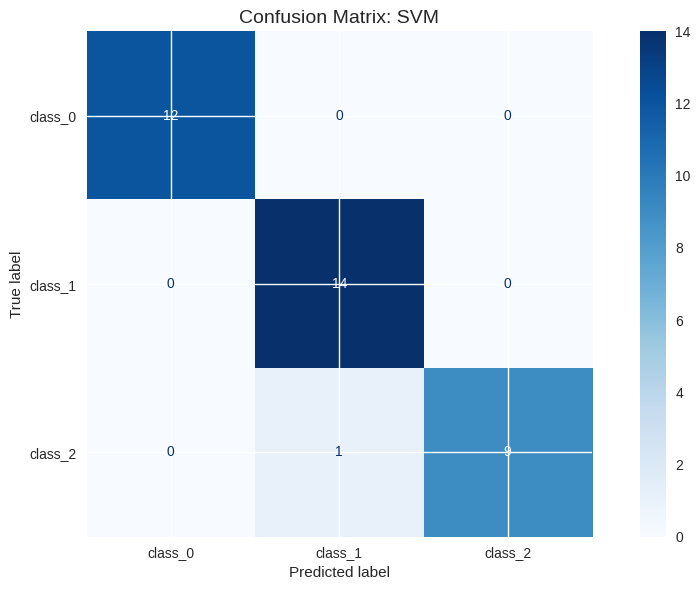


Classification Report for SVM:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting Training completed. Accuracy: 0.889
Creating confusion matrix for Gradient Boosting...


<Figure size 800x600 with 0 Axes>

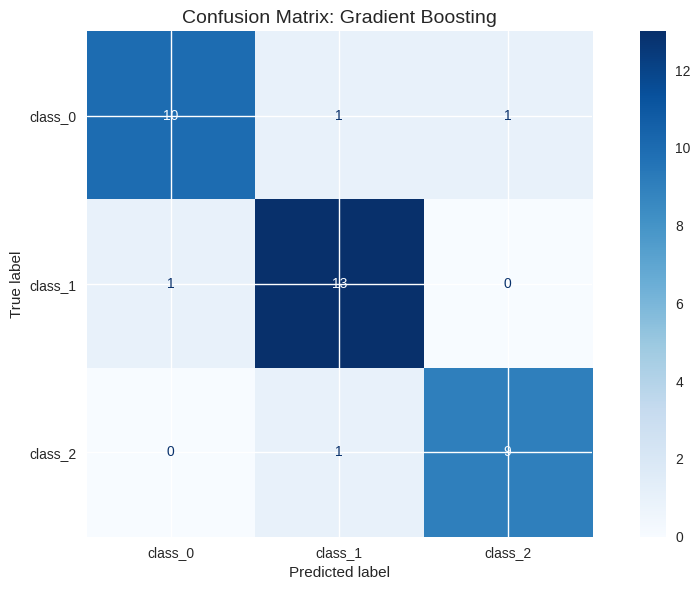


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

     class_0       0.91      0.83      0.87        12
     class_1       0.87      0.93      0.90        14
     class_2       0.90      0.90      0.90        10

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

--------------------------------------------------
Training KNN...
KNN Training completed. Accuracy: 1.000
Training Neural Network...
Neural Network Training completed. Accuracy: 0.944
CROSS-VALIDATION SCATTER PLOTS (NEW!)
Creating cross-validation predictions scatter plot...
Generating CV predictions for Random Forest...
Generating CV predictions for SVM...
Generating CV predictions for Gradient Boosting...


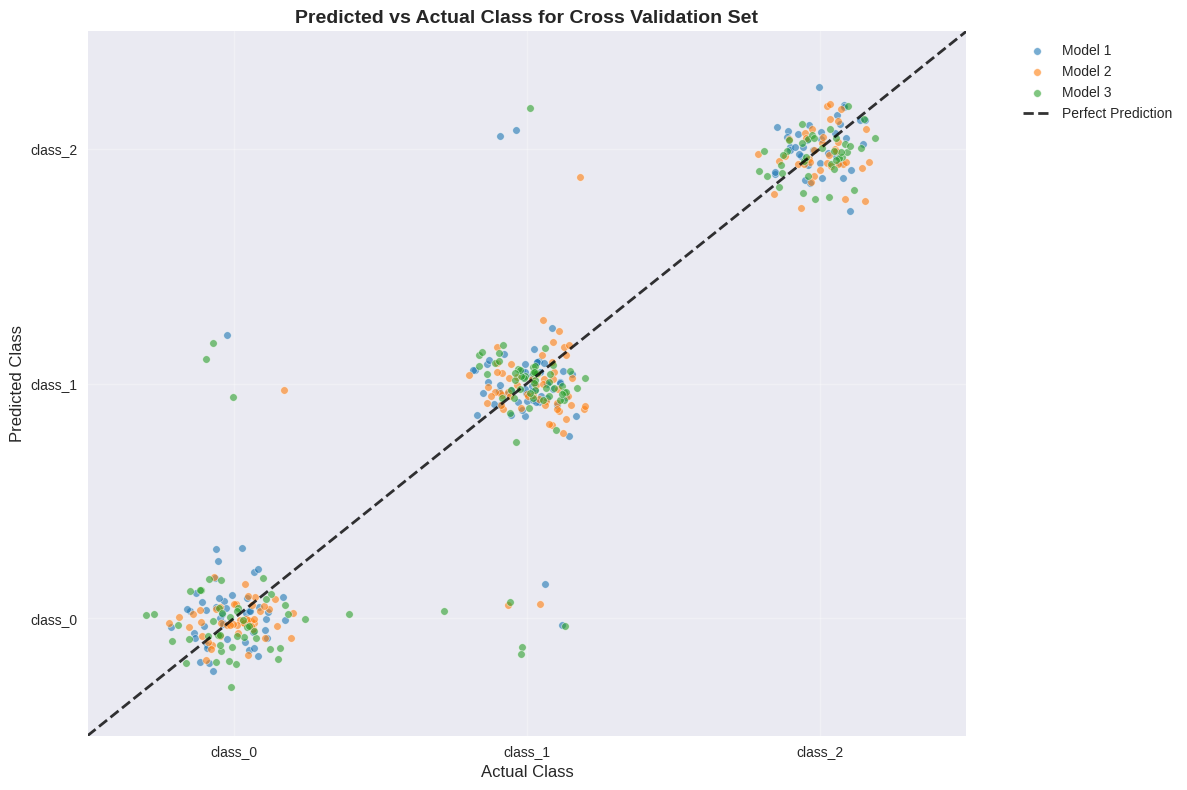


Cross-Validation Accuracies:
Model 1 (Random Forest): 0.965 ± 0.031
Model 2 (SVM): 0.972 ± 0.040
Model 3 (Gradient Boosting): 0.937 ± 0.050
--------------------------------------------------
Creating cross-validation probability scatter plot...
Generating probability predictions for Random Forest...
Generating probability predictions for SVM...
Generating probability predictions for Gradient Boosting...


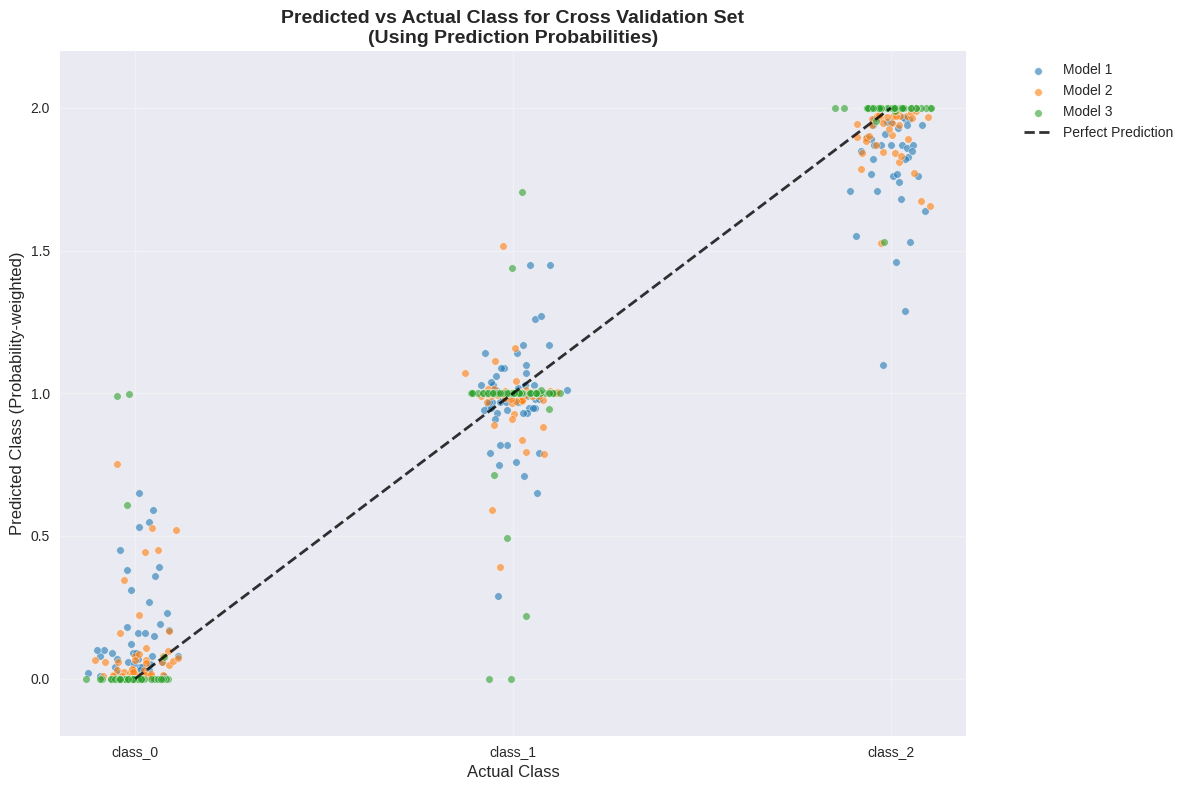

PCA VISUALIZATIONS
Creating 2D PCA plot...
Explained variance ratio: PC1=0.298, PC2=0.177


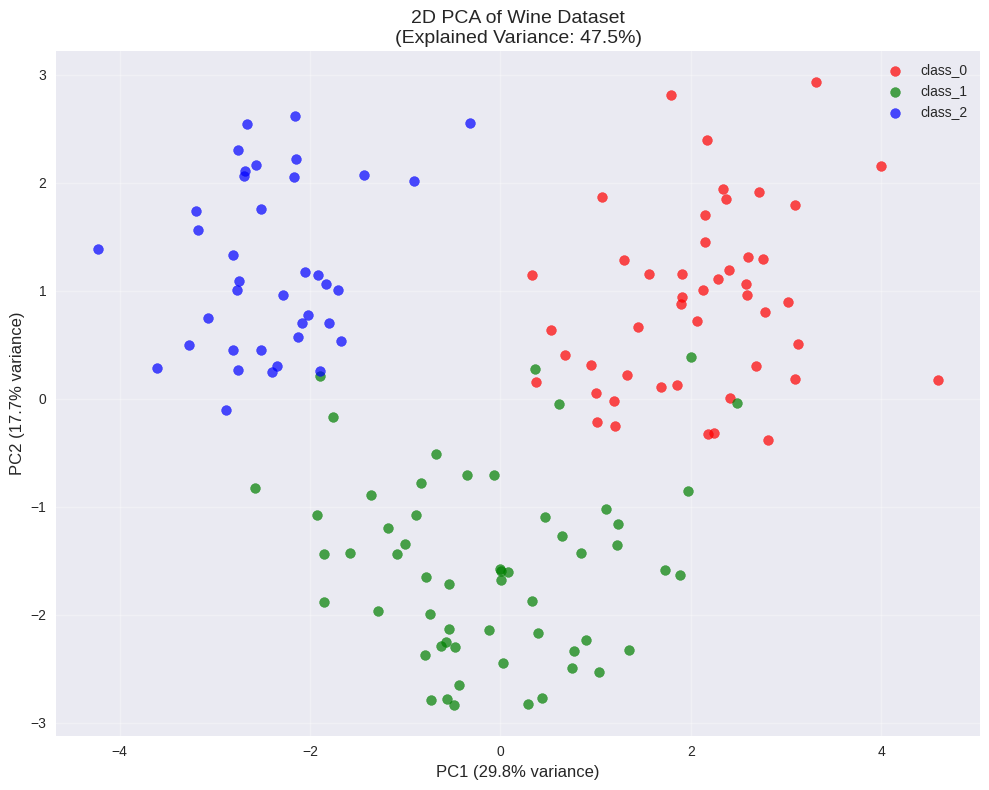

Creating 3D PCA plot...
3D Explained variance ratio: PC1=0.298, PC2=0.177, PC3=0.099


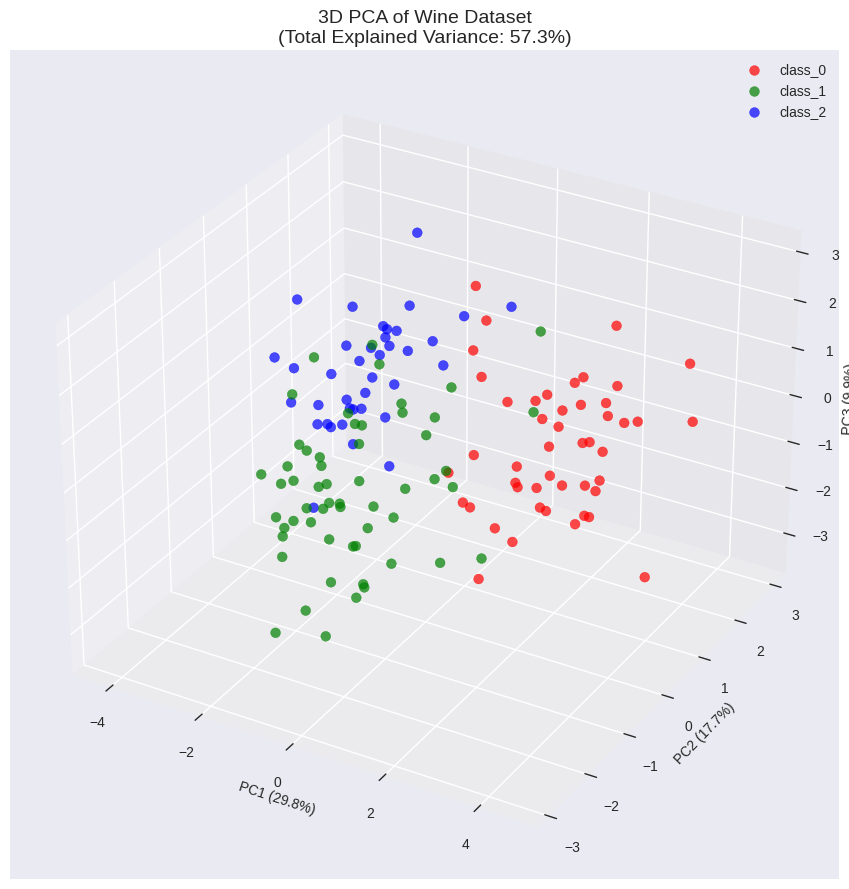

MODEL COMPARISON
Creating model comparison plot...


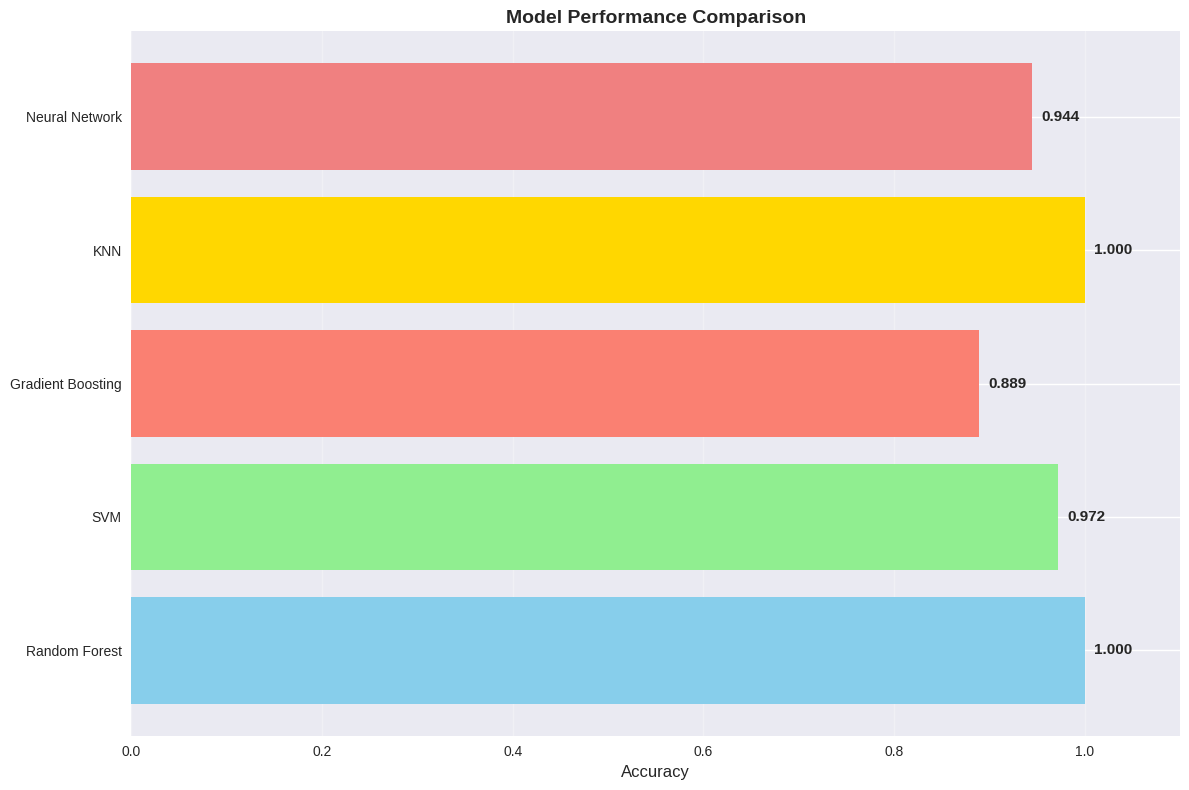


Model Performance Summary:
Random Forest: 1.000
KNN: 1.000
SVM: 0.972
Neural Network: 0.944
Gradient Boosting: 0.889
FEATURE IMPORTANCE ANALYSIS
Creating feature importance plot for Random Forest...


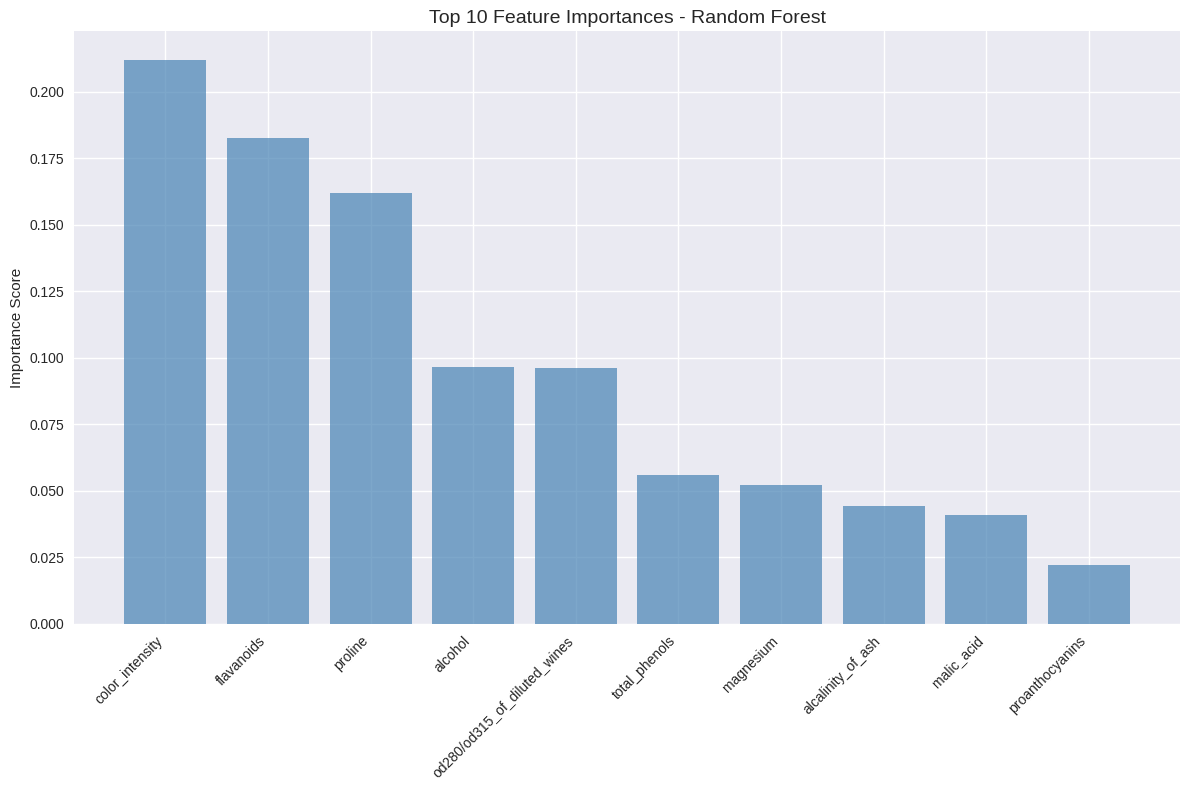


Top 10 features for Random Forest:
1. color_intensity: 0.2121
2. flavanoids: 0.1828
3. proline: 0.1618
4. alcohol: 0.0967
5. od280/od315_of_diluted_wines: 0.0962
6. total_phenols: 0.0562
7. magnesium: 0.0522
8. alcalinity_of_ash: 0.0443
9. malic_acid: 0.0408
10. proanthocyanins: 0.0221
--------------------------------------------------
Creating feature importance plot for Gradient Boosting...


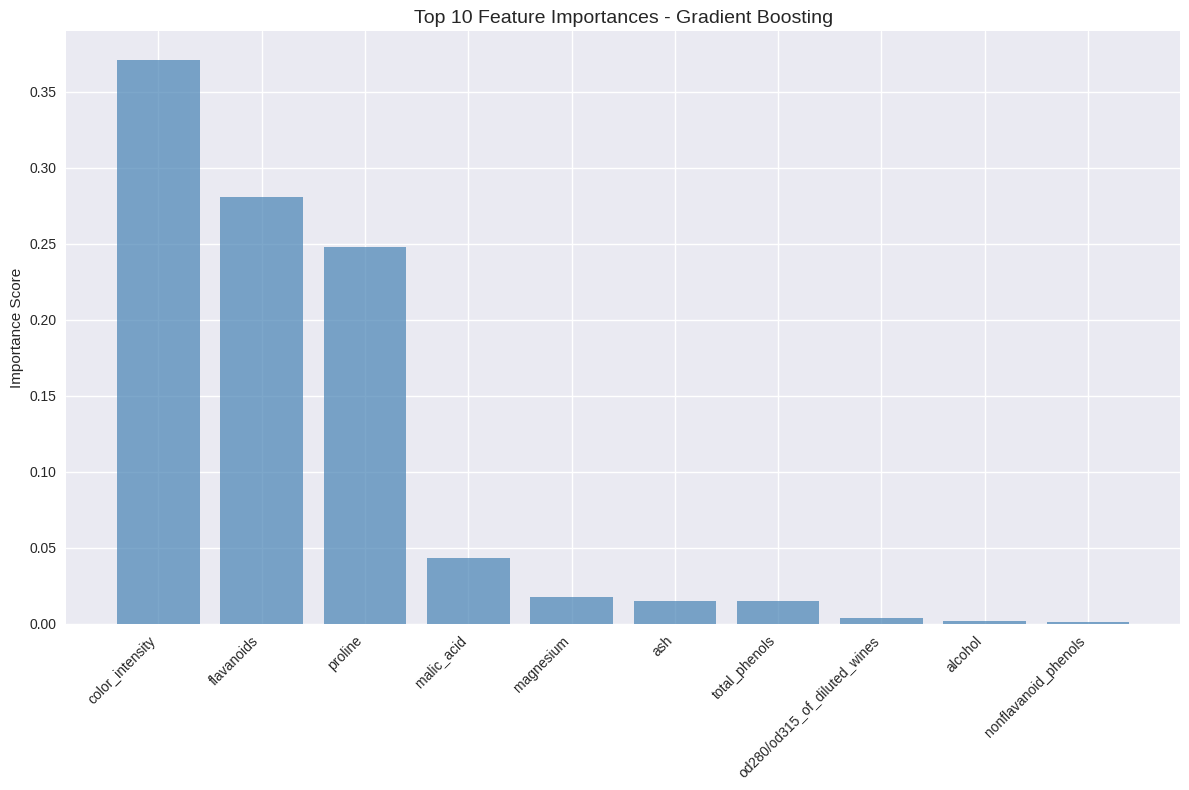


Top 10 features for Gradient Boosting:
1. color_intensity: 0.3713
2. flavanoids: 0.2806
3. proline: 0.2478
4. malic_acid: 0.0436
5. magnesium: 0.0179
6. ash: 0.0152
7. total_phenols: 0.0152
8. od280/od315_of_diluted_wines: 0.0042
9. alcohol: 0.0021
10. nonflavanoid_phenols: 0.0014
--------------------------------------------------
CROSS-VALIDATION ANALYSIS
Performing cross-validation for all models...
Random Forest CV Score: 0.965 (+/- 0.063)
SVM CV Score: 0.972 (+/- 0.080)
Gradient Boosting CV Score: 0.937 (+/- 0.101)
KNN CV Score: 0.972 (+/- 0.081)
Neural Network CV Score: 0.972 (+/- 0.052)
Creating cross-validation comparison plot...


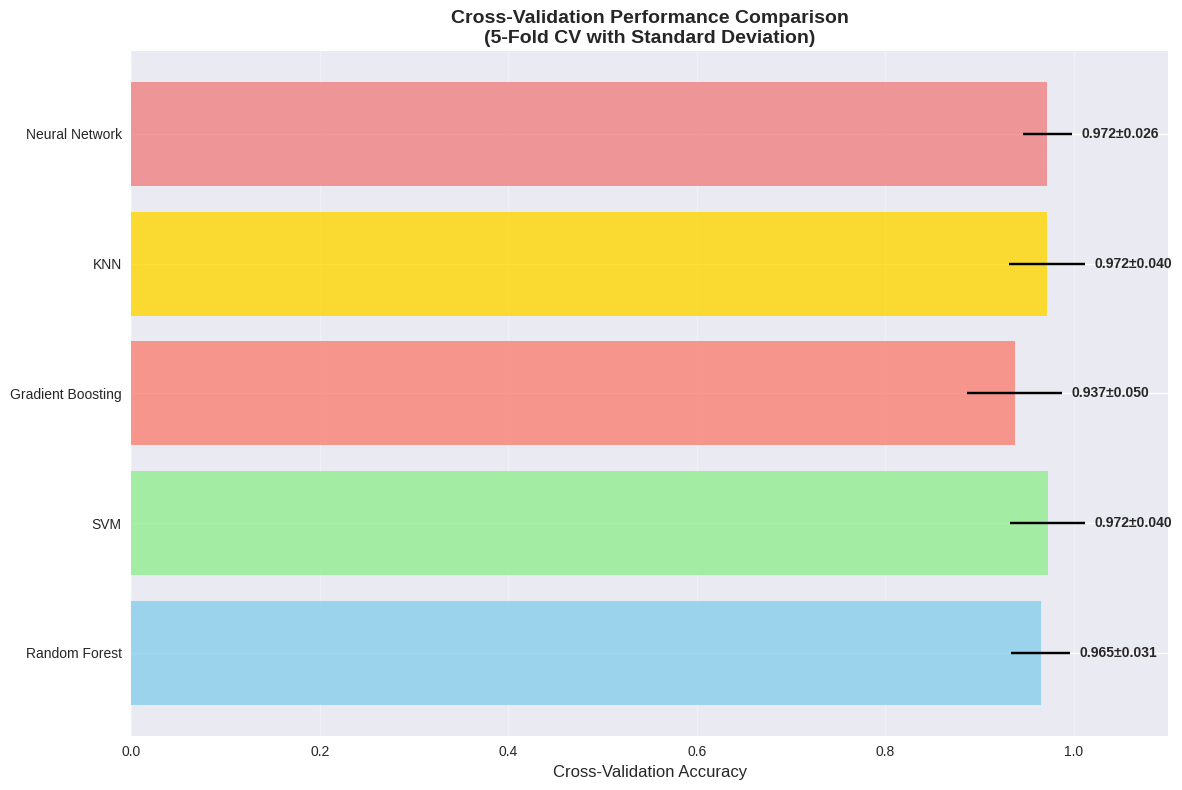

ANALYSIS COMPLETE!


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for inline display in Colab
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [10, 6]

# Load and prepare the Wine dataset
def load_data():
    """Load the Wine dataset from sklearn"""
    print("Loading Wine dataset...")
    data = load_wine()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    print(f"Dataset shape: {X.shape}")
    print(f"Number of classes: {len(target_names)}")
    print(f"Class names: {target_names}")
    print(f"Feature names: {feature_names[:5]}... (showing first 5)")
    print("-" * 50)

    return X, y, feature_names, target_names

# Add noise to the dataset to lower accuracy (for simulation)
def add_noise(X, noise_factor=0.2):
    """Add Gaussian noise to features"""
    print(f"Adding noise with factor: {noise_factor}")
    random_noise = np.random.normal(scale=noise_factor, size=X.shape)
    X_noisy = X + random_noise
    return X_noisy

# Standardize the dataset
def standardize_data(X_train, X_test):
    """Standardize features using StandardScaler"""
    print("Standardizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    """Train model and return predictions with accuracy"""
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Training completed. Accuracy: {accuracy:.3f}")
    return accuracy, y_pred

# NEW FUNCTION: Cross-validation scatter plot like your image
def plot_cv_predictions_scatter(models, X_train, y_train, target_names):
    """Create scatter plot of predicted vs actual values for cross-validation"""
    print("Creating cross-validation predictions scatter plot...")

    # Colors for different models (similar to your image)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    plt.figure(figsize=(12, 8))

    # Add some jitter for better visualization since we have discrete classes
    jitter_strength = 0.1

    model_names = list(models.keys())[:3]  # Use first 3 models for clarity

    for idx, (model_name, model) in enumerate(list(models.items())[:3]):
        print(f"Generating CV predictions for {model_name}...")

        # Get cross-validation predictions
        y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

        # Add jitter to both actual and predicted values for better visualization
        actual_jittered = y_train + np.random.normal(0, jitter_strength, len(y_train))
        pred_jittered = y_pred_cv + np.random.normal(0, jitter_strength, len(y_pred_cv))

        # Create scatter plot
        plt.scatter(actual_jittered, pred_jittered,
                   alpha=0.6, s=30, color=colors[idx],
                   label=f'Model {idx+1}', edgecolors='white', linewidth=0.5)

    # Add perfect prediction line (diagonal)
    plt.plot([-0.5, 2.5], [-0.5, 2.5], 'k--', alpha=0.8, linewidth=2, label='Perfect Prediction')

    # Customize the plot
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 2.5)
    plt.xlabel('Actual Class', fontsize=12)
    plt.ylabel('Predicted Class', fontsize=12)
    plt.title('Predicted vs Actual Class for Cross Validation Set', fontsize=14, fontweight='bold')

    # Set integer ticks for class labels
    plt.xticks([0, 1, 2], target_names)
    plt.yticks([0, 1, 2], target_names)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print CV accuracy for each model
    print("\nCross-Validation Accuracies:")
    for idx, (model_name, model) in enumerate(list(models.items())[:3]):
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Model {idx+1} ({model_name}): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print("-" * 50)

# Alternative: Probability-based scatter plot for better continuous visualization
def plot_cv_probability_scatter(models, X_train, y_train, target_names):
    """Create scatter plot using prediction probabilities for smoother visualization"""
    print("Creating cross-validation probability scatter plot...")

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    plt.figure(figsize=(12, 8))

    model_names = list(models.keys())[:3]

    for idx, (model_name, model) in enumerate(list(models.items())[:3]):
        # Skip models that don't support probability prediction
        if not hasattr(model, 'predict_proba') and model_name != 'SVM':
            continue

        print(f"Generating probability predictions for {model_name}...")

        # For SVM, we need to set probability=True
        if model_name == 'SVM':
            model_prob = SVC(kernel='rbf', random_state=42, probability=True)
        else:
            model_prob = model

        # Get cross-validation probability predictions
        try:
            y_pred_proba_cv = cross_val_predict(model_prob, X_train, y_train, cv=5, method='predict_proba')

            # Convert probabilities to continuous predicted values
            predicted_continuous = np.dot(y_pred_proba_cv, np.array([0, 1, 2]))

            # Add small jitter to actual values for visualization
            actual_jittered = y_train + np.random.normal(0, 0.05, len(y_train))

            plt.scatter(actual_jittered, predicted_continuous,
                       alpha=0.6, s=30, color=colors[idx],
                       label=f'Model {idx+1}', edgecolors='white', linewidth=0.5)
        except:
            print(f"Skipping {model_name} - probability prediction not supported")
            continue

    # Add perfect prediction line
    plt.plot([0, 2], [0, 2], 'k--', alpha=0.8, linewidth=2, label='Perfect Prediction')

    plt.xlim(-0.2, 2.2)
    plt.ylim(-0.2, 2.2)
    plt.xlabel('Actual Class', fontsize=12)
    plt.ylabel('Predicted Class (Probability-weighted)', fontsize=12)
    plt.title('Predicted vs Actual Class for Cross Validation Set\n(Using Prediction Probabilities)',
              fontsize=14, fontweight='bold')

    plt.xticks([0, 1, 2], target_names)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot 2D PCA components
def plot_pca_2d(X_train, y_train, target_names):
    """Create 2D PCA visualization"""
    print("Creating 2D PCA plot...")
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)

    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance ratio: PC1={explained_variance[0]:.3f}, PC2={explained_variance[1]:.3f}")

    plt.figure(figsize=(10, 8))
    colors = ['red', 'green', 'blue']

    for i, (color, target_name) in enumerate(zip(colors, target_names)):
        plt.scatter(X_train_pca[y_train == i, 0],
                   X_train_pca[y_train == i, 1],
                   c=color, label=target_name, alpha=0.7, s=50)

    plt.title(f'2D PCA of Wine Dataset\n(Explained Variance: {sum(explained_variance):.1%})', fontsize=14)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)', fontsize=12)
    plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot 3D PCA components
def plot_pca_3d(X_train, y_train, target_names):
    """Create 3D PCA visualization"""
    print("Creating 3D PCA plot...")
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train)

    explained_variance = pca.explained_variance_ratio_
    print(f"3D Explained variance ratio: PC1={explained_variance[0]:.3f}, PC2={explained_variance[1]:.3f}, PC3={explained_variance[2]:.3f}")

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['red', 'green', 'blue']
    for i, (color, target_name) in enumerate(zip(colors, target_names)):
        ax.scatter(X_train_pca[y_train == i, 0],
                  X_train_pca[y_train == i, 1],
                  X_train_pca[y_train == i, 2],
                  c=color, label=target_name, alpha=0.7, s=50)

    ax.set_title(f'3D PCA of Wine Dataset\n(Total Explained Variance: {sum(explained_variance):.1%})', fontsize=14)
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.1%})', fontsize=10)
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.1%})', fontsize=10)
    ax.set_zlabel(f'PC3 ({explained_variance[2]:.1%})', fontsize=10)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name, target_names):
    """Plot confusion matrix for model predictions"""
    print(f"Creating confusion matrix for {model_name}...")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Print classification report details
    from sklearn.metrics import classification_report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("-" * 50)

# Perform hyperparameter tuning with GridSearchCV
def grid_search(model, param_grid, X_train, y_train, model_name):
    """Perform grid search for hyperparameter tuning"""
    print(f"Performing grid search for {model_name}...")
    print(f"Parameter grid: {param_grid}")

    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Grid search completed for {model_name}")
    return grid_search.best_params_, grid_search.best_score_

# Perform cross-validation for a model
def cross_validate(model, X_train, y_train, cv=5):
    """Perform cross-validation"""
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    return cv_scores.mean(), cv_scores.std()

# Plot performance comparison
def plot_model_comparison(results):
    """Create bar chart comparing model performances"""
    print("Creating model comparison plot...")

    models = list(results.keys())
    accuracies = list(results.values())

    plt.figure(figsize=(12, 8))
    bars = plt.barh(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral'])

    # Add value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        plt.text(acc + 0.01, i, f'{acc:.3f}', va='center', fontsize=11, fontweight='bold')

    plt.xlabel('Accuracy', fontsize=12)
    plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
    plt.xlim(0, 1.1)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot cross-validation results with error bars
def plot_cv_comparison(cv_results):
    """Create bar chart comparing cross-validation scores with error bars"""
    print("Creating cross-validation comparison plot...")

    models = list(cv_results.keys())
    cv_means = [cv_results[model][0] for model in models]
    cv_stds = [cv_results[model][1] for model in models]

    plt.figure(figsize=(12, 8))

    # Create horizontal bar chart with error bars
    bars = plt.barh(models, cv_means, xerr=cv_stds,
                   color=['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral'],
                   alpha=0.8, capsize=5)

    # Add value labels on bars
    for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
        plt.text(mean + std + 0.01, i, f'{mean:.3f}±{std:.3f}',
                va='center', fontsize=10, fontweight='bold')

    plt.xlabel('Cross-Validation Accuracy', fontsize=12)
    plt.title('Cross-Validation Performance Comparison\n(5-Fold CV with Standard Deviation)',
              fontsize=14, fontweight='bold')
    plt.xlim(0, 1.1)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Feature importance analysis
def plot_feature_importance(model, feature_names, model_name, top_n=10):
    """Plot feature importance for tree-based models"""
    if hasattr(model, 'feature_importances_'):
        print(f"Creating feature importance plot for {model_name}...")

        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1][:top_n]

        plt.figure(figsize=(12, 8))
        plt.title(f'Top {top_n} Feature Importances - {model_name}', fontsize=14)
        plt.bar(range(top_n), importance[indices], alpha=0.7, color='steelblue')
        plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.ylabel('Importance Score')
        plt.tight_layout()
        plt.show()

        # Print top features
        print(f"\nTop {top_n} features for {model_name}:")
        for i in range(top_n):
            print(f"{i+1}. {feature_names[indices[i]]}: {importance[indices[i]]:.4f}")
        print("-" * 50)

def main():
    """Main execution function"""
    print("=" * 60)
    print("WINE CLASSIFICATION ANALYSIS")
    print("=" * 60)

    # Load data
    X, y, feature_names, target_names = load_data()

    # Add noise to the data to lower accuracy
    X = add_noise(X, noise_factor=0.3)

    # Split the data (80% train, 20% test)
    print("Splitting data (80% train, 20% test)...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print("-" * 50)

    # Standardize the features
    X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)

    # Initialize models
    print("Initializing models...")
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    }

    print("=" * 60)
    print("MODEL TRAINING AND EVALUATION")
    print("=" * 60)

    # Evaluate models
    results = {}
    model_objects = {}  # Store trained models

    for model_name, model in models.items():
        accuracy, y_pred = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name)
        results[model_name] = accuracy
        model_objects[model_name] = model

        # Plot confusion matrix for first 3 models only (to save space)
        if len(model_objects) <= 3:
            plot_confusion_matrix(y_test, y_pred, model_name, target_names)

    print("=" * 60)
    print("CROSS-VALIDATION SCATTER PLOTS (NEW!)")
    print("=" * 60)

    # NEW: Create cross-validation scatter plots like your image
    plot_cv_predictions_scatter(models, X_train_scaled, y_train, target_names)
    plot_cv_probability_scatter(models, X_train_scaled, y_train, target_names)

    print("=" * 60)
    print("PCA VISUALIZATIONS")
    print("=" * 60)

    # PCA visualizations
    plot_pca_2d(X_train_scaled, y_train, target_names)
    plot_pca_3d(X_train_scaled, y_train, target_names)

    print("=" * 60)
    print("MODEL COMPARISON")
    print("=" * 60)

    # Results Comparison
    plot_model_comparison(results)

    # Print summary
    print("\nModel Performance Summary:")
    for model_name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f"{model_name}: {accuracy:.3f}")

    print("=" * 60)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("=" * 60)

    # Feature importance for tree-based models
    for model_name in ['Random Forest', 'Gradient Boosting']:
        if model_name in model_objects:
            plot_feature_importance(model_objects[model_name], feature_names, model_name)

    print("=" * 60)
    print("CROSS-VALIDATION ANALYSIS")
    print("=" * 60)

    # Cross-validation for all models
    print("Performing cross-validation for all models...")
    cv_results = {}

    for model_name, model in models.items():
        cv_mean, cv_std = cross_validate(model, X_train_scaled, y_train)
        cv_results[model_name] = (cv_mean, cv_std)
        print(f"{model_name} CV Score: {cv_mean:.3f} (+/- {cv_std*2:.3f})")

    # Plot cross-validation comparison
    plot_cv_comparison(cv_results)

    print("=" * 60)
    print("ANALYSIS COMPLETE!")
    print("=" * 60)

    return results, model_objects, cv_results

# Execute the main function
if __name__ == "__main__":
    # This ensures the code runs when executed
    results, trained_models, cv_results = main()